# Text Classification Model

##  Task:- Classifying Judgements into Successful or Unsuccessful

## 1. Data Collection:- 192 reports have been acquired of South Delhi District Commission using the Confonent website and has been saved in a csv file alongside information such as case_filing_date, judgement result, case_stage_id, file_application_number, case_category

## 2. Data Preprocessing:-

### 2.1. Loading the dataset:-

In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
# Loading our dataset into df variable
df=pd.read_csv('/home/sakhiltaneja/Desktop/NLP/Database/reports_complete.csv')

In [150]:
df.head()

,file_application_number,case_filing_date,case_category_name_en,judgement,judgement_result,case_stage_id
0,8/6/CC/101/2019,2019-04-12,AUTOMOBILES,DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...,0,7
1,8/6/CC/102/2017,2017-03-21,HOUSE HOLD GOODS,DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...,0,7
2,8/6/CC/106/2018,2018-04-04,TELECOM,DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...,0,7
3,8/6/CC/107/2018,2018-04-06,INDUSTRIAL/COMMERCIAL GOODS & SERVICES,DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...,0,7
4,8/6/CC/109/2019,2019-04-18,INSURANCE,DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...,0,7


### 2.2. Loading a prebuilt Data Preprocessing pipeline using Spacy

In [151]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [152]:
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [153]:
df['judgement_result'].value_counts()
# 1 - Successful
# 2 - Unsuccessful
# 3 - Other

judgement_result
1    129
0     64
2      1
Name: count, dtype: int64

### 2.3. Performing data preprocessing on text:-

In [154]:
# Removing the instances where judgement_result has label 2
df=df[df['judgement_result']!=2]

In [155]:
df['judgement_result'].value_counts()

judgement_result
1    129
0     64
Name: count, dtype: int64

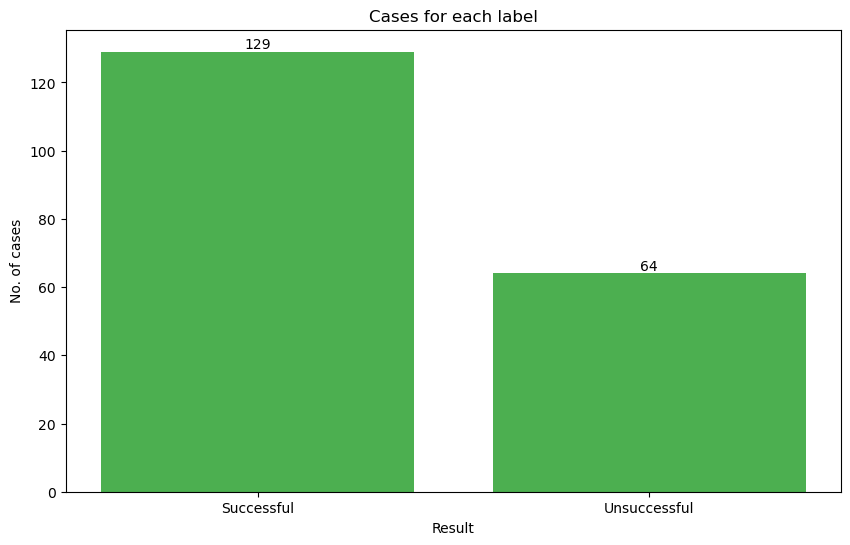

In [156]:
# Create the bar plot
results = df['judgement_result'].value_counts()
bars = plt.bar(('Successful','Unsuccessful'), results.values, color='#4CAF50')

for bar, value in zip(bars, results.values):
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height + 0.1, f"{value}", ha='center', va='bottom')

plt.xlabel("Result")
plt.ylabel("No. of cases")
plt.title("Cases for each label")
plt.show()

Conclusion:- We need to handle the data imbalance

In [157]:
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#### Converting String values to Numerical values of 'case_category_name_en' column

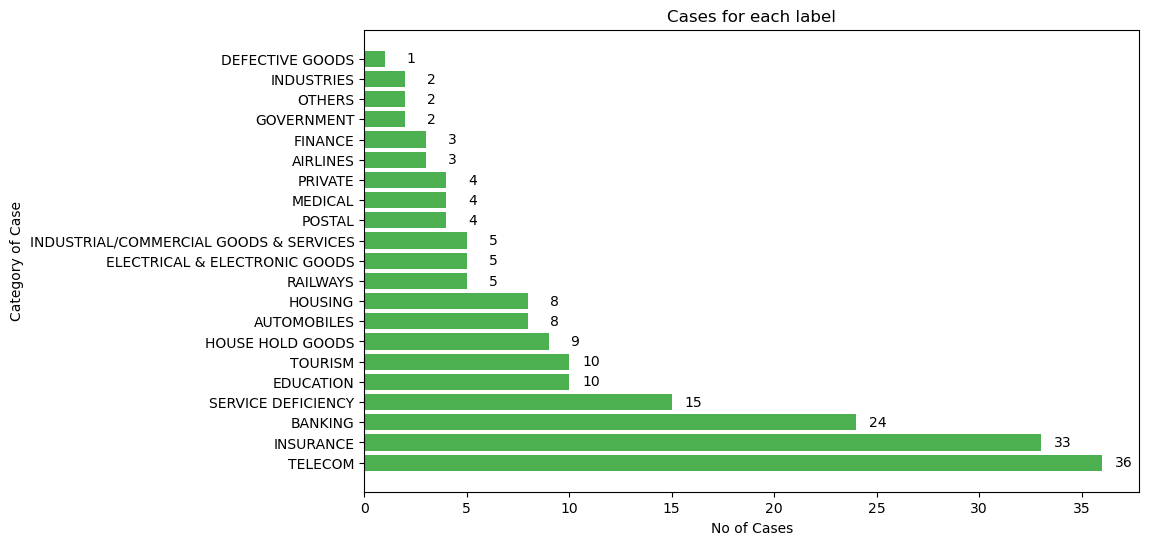

In [158]:
# Create the bar plot
results = df['case_category_name_en'].value_counts()
bars = plt.barh(results.index, results.values, color='#4CAF50')

# Get bar positions and lengths
bar_y = [bar.get_y() + bar.get_height() / 2 for bar in bars]  # Center y position
bar_width = [bar.get_width() for bar in bars]  # Get bar width

# Add text after each bar (assuming right alignment)
for bar_y_pos, value, bar_width_val in zip(bar_y, results.values, bar_width):
  plt.text(bar_width_val + 1.5, bar_y_pos, f"{value}", ha='right', va='center')  # Adjust offset as needed

plt.xlabel("No of Cases")
plt.ylabel("Category of Case")
plt.title("Cases for each label")
plt.show()

In [159]:
df['case_category']=LabelEncoder().fit(list(df['case_category_name_en'])).transform(df['case_category_name_en'])


In [160]:
df['case_category'].value_counts()

case_category
19    36
12    33
2     24
18    15
4     10
20    10
8      9
1      8
9      8
17     5
5      5
10     5
15     4
13     4
16     4
0      3
6      3
7      2
14     2
11     2
3      1
Name: count, dtype: int64

In [161]:
print(re.sub(re.compile('<.*?>'), '', df['judgement'][1]))

DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSION-II UDYOG SADAN C 22 23
QUTUB INSTITUTIONNAL AREA BEHIND QUTUB HOTEL NEW DELHI 110016
Complaint Case No. CC/102/2017
( Date of Filing : 21 Mar 2017 )
1. VIJAY KUMAR CHAUHAN
K-003 STELLAR JEEVAN, GREATER NOIDA W UTTAR PRADESH 201306
...........Complainant(s)
Versus
1. STELLAR CONSTELLATION PROJECT PVT LTD
B-29 SHEIKH SARAI, PHASE-I NEW DELHI 110017
............Opp.Party(s)
BEFORE:
MONIKA A. SRIVASTAVA PRESIDENT
KIRAN KAUSHAL MEMBER
UMESH KUMAR TYAGI MEMBER
PRESENT:
Dated : 27 Dec 2022
Final Order / Judgement
DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSION-II
Udyog Sadan, C-22 & 23, Qutub Institutional Area
(Behind Qutub Hotel), New Delhi- 110016
Case No. 102/17
Cause Title/Judgement-Entry
https://cms.nic.in/ncdrcusersWeb/search.do?method=loadSearchPub
1 of 6
08-05-2024, 14:14
Vijay Kumar Chauhan
S/o Late S.L Chauhan
K-003, Stellar Jeevan,
Greater Noida (W)
UP-201306
….Complainant
Versus
Stellar Constellation Project Pvt. Ltd.
B-29, Sheikh S

#### Creating a preprocesssing class to perform preprocessing on judgement text

In [162]:
def preprocess(text):
    text=re.sub(re.compile('<.*?>'), '', text)
    text=text.lower()
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    return ' '.join(filtered_tokens)

In [163]:
df['preprocessed_judgements']=df['judgement'].apply(lambda judgement: preprocess(judgement))

In [164]:
a=df[df['judgement_result']==1]
a['preprocessed_judgements']

64     district consumer dispute redressal commission...
65     consumer dispute redressal forum -ii udyog sad...
66     district consumer dispute redressal commission...
67     district consumer dispute redressal commission...
68     district consumer dispute redressal commission...
                             ...                        
188    district consumer dispute redressal commission...
189    consumer dispute redressal forum -ii udyog sad...
190    district consumer dispute redressal commission...
191    district consumer dispute redressal commission...
192    district consumer dispute redressal commission...
Name: preprocessed_judgements, Length: 129, dtype: object

In [165]:
print(df['file_application_number'][65])

8/6/CC/103/2016


## 3. Feature Engineering:- 

### Tokenization:- 

#### Using NLTK library to create single tokens from the preprocessed text

In [166]:
from nltk.tokenize import word_tokenize
df['tokenized judgements']=df['preprocessed_judgements'].apply(lambda judgement: word_tokenize(judgement))

In [167]:
df['tokenized judgements'][1]

['district',
 'consumer',
 'dispute',
 'redressal',
 'commission',
 'ii',
 'udyog',
 'sadan',
 'c',
 '22',
 '23',
 'qutub',
 'institutionnal',
 'area',
 'qutub',
 'hotel',
 'new',
 'delhi',
 '110016',
 'complaint',
 'case',
 'cc/102/2017',
 'date',
 'filing',
 '21',
 'mar',
 '2017',
 '1',
 'vijay',
 'kumar',
 'chauhan',
 'k-003',
 'stellar',
 'jeevan',
 'great',
 'noida',
 'w',
 'uttar',
 'pradesh',
 '201306',
 'complainant',
 '(',
 's',
 'versus',
 '1',
 'stellar',
 'constellation',
 'project',
 'pvt',
 'ltd',
 'b-29',
 'sheikh',
 'sarai',
 'phase',
 'new',
 'delhi',
 '110017',
 'opp.party',
 '(',
 's',
 'monika',
 'a.',
 'srivastava',
 'president',
 'kiran',
 'kaushal',
 'member',
 'umesh',
 'kumar',
 'tyagi',
 'member',
 'present',
 'date',
 '27',
 'dec',
 '2022',
 'final',
 'order',
 'judgement',
 'district',
 'consumer',
 'dispute',
 'redressal',
 'commission',
 'ii',
 'udyog',
 'sadan',
 'c-22',
 '23',
 'qutub',
 'institutional',
 'area',
 'qutub',
 'hotel',
 'new',
 'delhi-',
 '

### Vectorization:-

#### Using the Inbult method for Vectorization in spacy pipeline

In [168]:
df['vector'] = df['preprocessed_judgements'].apply(lambda text: nlp(text).vector) 

In [169]:
df['vector'][1]

array([-0.08922207, -0.54116255, -0.10237668, -0.06975121,  0.06325828,
       -0.137141  ,  0.16052577,  0.9759455 ,  0.17627357, -0.10154496,
       -0.19363482,  0.6151751 , -0.46030277, -0.32929564,  0.01031409,
        0.30953002, -0.17334463, -0.02450221, -0.69217396, -0.3652613 ,
        0.0469526 ,  0.7290244 , -0.09472074,  0.12092171,  0.11676577,
       -0.21497443,  0.3389722 ,  0.5919068 ,  0.30460453, -0.21754356,
        0.07977628, -0.14077823, -0.10638784,  0.25460252,  0.30809522,
       -0.3699868 ,  0.93928885,  0.14526805, -0.36649936, -0.4207027 ,
       -0.44782475,  0.28268576,  0.134093  ,  0.33862618, -0.19026364,
        0.02424227, -0.37874994,  0.00250193, -0.5541729 ,  0.16239776,
       -0.5249747 ,  0.25897264,  0.13744618, -0.38431537, -0.44902477,
       -0.16451935,  0.016852  , -0.1284305 ,  0.10790477, -0.16979897,
       -0.49210835,  0.3082294 ,  0.29144385, -0.42463073, -0.33706972,
       -0.10152429, -0.19870299,  0.11731137,  0.09301225, -0.02

#### Vectorization with Tf-idf vectors will be done directly in the ML model Pipeline

###  Handling Class Imbalance:- 

In [170]:
count_class_1,count_class_0=df.judgement_result.value_counts()

df_class_1=df[df['judgement_result']==1]
df_class_0=df[df['judgement_result']==0]

#### By Duplicating Values:-  

In [171]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
#df_class_0_over = df_class_0.sample(1000, replace=True)
#df_class_1_over = df_class_1.sample(1000, replace=True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_test_over.judgement_result.value_counts())

Random over-sampling:
judgement_result
1    129
0    129
Name: count, dtype: int64


In [172]:
df_test_over.head(129)

,file_application_number,case_filing_date,case_category_name_en,judgement,judgement_result,case_stage_id,case_category,preprocessed_judgements,tokenized judgements,vector
64,8/6/CC/100/2019,2019-04-11,SERVICE DEFICIENCY,DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...,1,7,18,district consumer dispute redressal commission...,"[district, consumer, dispute, redressal, commi...","[-0.13295366, -0.49580726, -0.03802943, -0.145..."
65,8/6/CC/103/2016,2016-04-06,TELECOM,CONSUMER DISPUTES REDRESSAL FORUM -II UDYOG SA...,1,7,19,consumer dispute redressal forum -ii udyog sad...,"[consumer, dispute, redressal, forum, -ii, udy...","[-0.12625152, -0.4310686, -0.10506026, -0.1065..."
66,8/6/CC/104/2017,2017-03-24,INDUSTRIAL/COMMERCIAL GOODS & SERVICES,DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...,1,7,10,district consumer dispute redressal commission...,"[district, consumer, dispute, redressal, commi...","[-0.1668581, -0.46053007, -0.09453784, -0.1665..."
67,8/6/CC/107/2016,2016-04-12,BANKING,DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...,1,7,2,district consumer dispute redressal commission...,"[district, consumer, dispute, redressal, commi...","[-0.18902232, -0.46064672, -0.10110816, -0.189..."
68,8/6/CC/110/2019,2019-04-22,INSURANCE,DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...,1,7,12,district consumer dispute redressal commission...,"[district, consumer, dispute, redressal, commi...","[-0.12124621, -0.5180263, -0.07067852, -0.1415..."
...,...,...,...,...,...,...,...,...,...,...
188,8/6/CC/95/2016,2016-03-30,INSURANCE,DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...,1,7,12,district consumer dispute redressal commission...,"[district, consumer, dispute, redressal, commi...","[-0.15407152, -0.46606287, -0.08928052, -0.161..."
189,8/6/CC/95/2019,2019-04-08,RAILWAYS,CONSUMER DISPUTES REDRESSAL FORUM -II UDYOG SA...,1,7,17,consumer dispute redressal forum -ii udyog sad...,"[consumer, dispute, redressal, forum, -ii, udy...","[-0.104431026, -0.54353875, 0.041597925, -0.13..."
190,8/6/CC/96/2019,2019-04-09,AUTOMOBILES,DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...,1,7,1,district consumer dispute redressal commission...,"[district, consumer, dispute, redressal, commi...","[-0.14792758, -0.5433336, -0.013504659, -0.134..."
191,8/6/CC/97/2019,2019-04-09,AUTOMOBILES,DISTRICT CONSUMER DISPUTES REDRESSAL COMMISSIO...,1,7,1,district consumer dispute redressal commission...,"[district, consumer, dispute, redressal, commi...","[-0.13898464, -0.5330832, -0.017695028, -0.139..."


## 4. Model Selection, Training & Evaluation:-

### Spliting the dataset for testing and training

In [173]:
X=df_test_over['vector']
y = df_test_over['judgement_result']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=15, stratify=y)

In [174]:
print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)

#X_train_numeric = [[float(element) for element in inner_list.split()] for inner_list in X_train]
#X_train_2d = np.stack(X_train_numeric)

X_train_2d = np.stack(X_train)

#X_test_numeric = [[float(element) for element in inner_list.split()] for inner_list in X_test]
#X_test_2d = np.stack(X_test_numeric)

X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train before reshaping:  (206,)
Shape of X_test before reshaping:  (52,)
Shape of X_train after reshaping:  (206, 96)
Shape of X_test after reshaping:  (52, 96)


### Using Spacy's Vectorization Method

#### Using Decision Trees

In [175]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

#1. creating a Decision Tree model object
clf = DecisionTreeClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.77      0.70        26
           1       0.71      0.58      0.64        26

    accuracy                           0.67        52
   macro avg       0.68      0.67      0.67        52
weighted avg       0.68      0.67      0.67        52



In [176]:
score=[]
name=[]
technique=[]
score.append(f1_score(y_test,y_pred))
name.append('Decision Tree Classifier')
technique.append('spacy vectorizer')

#### Using Naive Bayes Classifier

In [177]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

#doing scaling because Negative values will not pass into Naive Bayes models
scaler = MinMaxScaler()                                         
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

#1. creating a MultinomialNB model object 
clf = MultinomialNB()

#2. fit with all_train_embeddings and y_train
clf.fit(scaled_train_embed , y_train) 


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(scaled_test_embed)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.65      0.61        26
           1       0.59      0.50      0.54        26

    accuracy                           0.58        52
   macro avg       0.58      0.58      0.57        52
weighted avg       0.58      0.58      0.57        52



In [178]:
score.append(f1_score(y_test,y_pred))
name.append('Multinomial NB')
technique.append('spacy vectorizer')

In [179]:
print(score)

[0.6382978723404256, 0.5416666666666666]


[[17  9]
 [13 13]]


Text(95.72222222222221, 0.5, 'Truth')

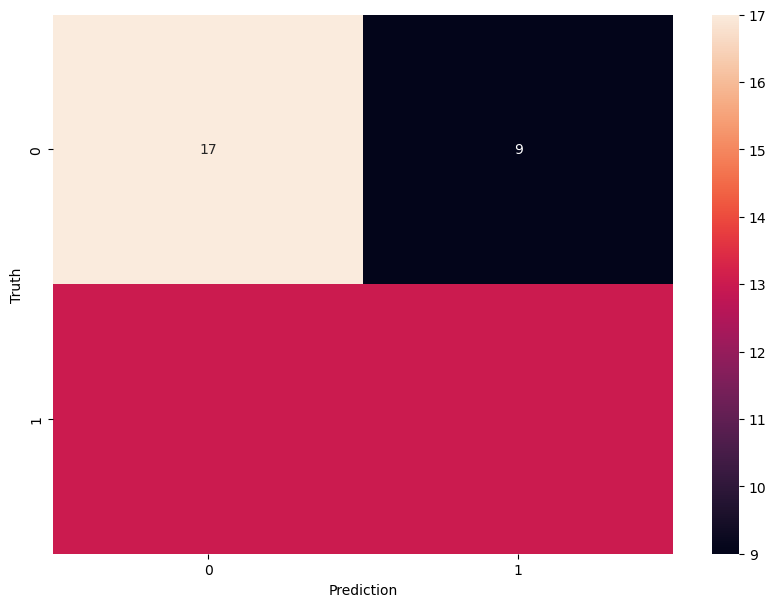

In [180]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

#### Using K Neighbours Classifier

In [181]:
from  sklearn.neighbors import KNeighborsClassifier


#1. creating a KNN model object
clf = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)

#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.81      0.69        26
           1       0.71      0.46      0.56        26

    accuracy                           0.63        52
   macro avg       0.65      0.63      0.62        52
weighted avg       0.65      0.63      0.62        52



[[21  5]
 [14 12]]


Text(95.72222222222221, 0.5, 'Truth')

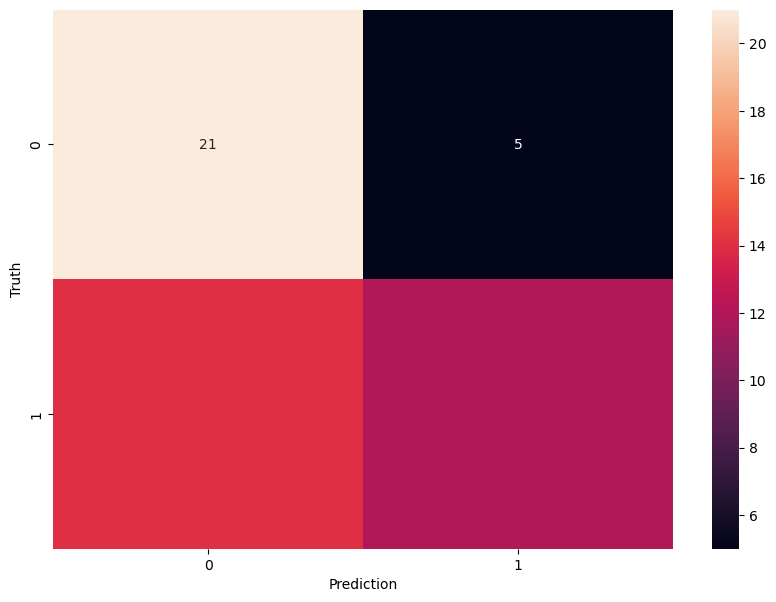

In [182]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

#### Using Random Forest Classifier

In [183]:
from sklearn.ensemble import RandomForestClassifier


#1. creating a Random Forest model object
clf = RandomForestClassifier()


#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.77      0.77        26
           1       0.77      0.77      0.77        26

    accuracy                           0.77        52
   macro avg       0.77      0.77      0.77        52
weighted avg       0.77      0.77      0.77        52



In [184]:
score.append(f1_score(y_test,y_pred))
name.append('Random Forest')
technique.append('spacy vectorizer')

[[20  6]
 [ 6 20]]


Text(33.22222222222222, 0.5, 'Truth')

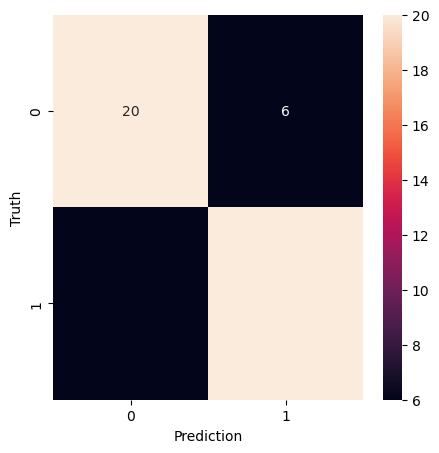

In [185]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (5,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

#### Using Gradient Boosting Classifier

In [190]:
from sklearn.ensemble import GradientBoostingClassifier


#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        26
           1       0.83      0.73      0.78        26

    accuracy                           0.79        52
   macro avg       0.79      0.79      0.79        52
weighted avg       0.79      0.79      0.79        52



In [187]:
score.append(f1_score(y_test,y_pred))
name.append('Gradient Boosting')
technique.append('spacy vectorizer')

In [188]:
name[3]='Gradient Boosting'

[[22  4]
 [ 8 18]]


Text(95.72222222222221, 0.5, 'Truth')

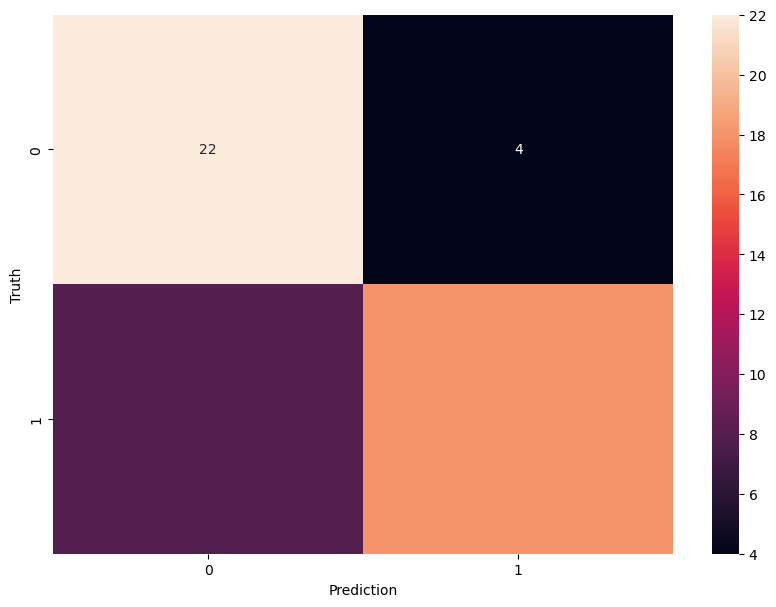

In [189]:
#finally print the confusion matrix for the best model: GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

#### Using Ada Boost Classifier

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification


#1. creating a GradientBoosting model object
clf = AdaBoostClassifier(algorithm="SAMME")

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74        26
           1       0.76      0.62      0.68        26

    accuracy                           0.71        52
   macro avg       0.72      0.71      0.71        52
weighted avg       0.72      0.71      0.71        52



In [50]:
score.append(f1_score(y_test,y_pred))
name.append('Ada Boost')
technique.append('spacy vectorizer')

[[24  2]
 [11 15]]


Text(95.72222222222221, 0.5, 'Truth')

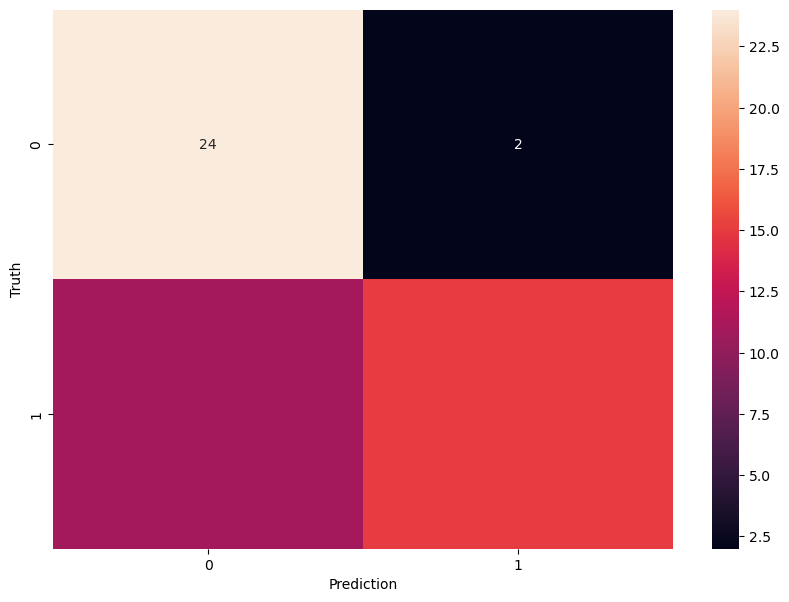

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

### Using Tf-Idf Method for Vectorization

In [191]:
count_class_1,count_class_0=df.judgement_result.value_counts()

df_class_1=df[df['judgement_result']==1]
df_class_0=df[df['judgement_result']==0]

In [192]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
#df_class_0_over = df_class_0.sample(1000, replace=True)
#df_class_1_over = df_class_1.sample(1000, replace=True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_test_over.judgement_result.value_counts())

Random over-sampling:
judgement_result
1    129
0    129
Name: count, dtype: int64


In [193]:
X=df_test_over['preprocessed_judgements']
y = df_test_over['judgement_result']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=15, stratify=y)

In [194]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('DecisionTreeClassifier', DecisionTreeClassifier())         
])

#2. fit with all_train_embeddings and y_train
clf.fit(X_train, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79        26
           1       0.80      0.77      0.78        26

    accuracy                           0.79        52
   macro avg       0.79      0.79      0.79        52
weighted avg       0.79      0.79      0.79        52



In [195]:
score.append(f1_score(y_test,y_pred))
name.append('Decision Tree Classifier')
technique.append('TF-IDF')

In [196]:
from sklearn.naive_bayes import MultinomialNB


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),    
     ('Multi NB', MultinomialNB())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71        26
           1       0.70      0.73      0.72        26

    accuracy                           0.71        52
   macro avg       0.71      0.71      0.71        52
weighted avg       0.71      0.71      0.71        52



In [197]:
score.append(f1_score(y_test,y_pred))
name.append('Multinomial NB')
technique.append('TF-IDF')

In [198]:
from sklearn.ensemble import RandomForestClassifier

#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Random Forest', RandomForestClassifier())         
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.78      0.69      0.73        26

    accuracy                           0.75        52
   macro avg       0.75      0.75      0.75        52
weighted avg       0.75      0.75      0.75        52



In [199]:
score.append(f1_score(y_test,y_pred))
name.append('Random Forest')
technique.append('TF-IDF')

In [203]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Gradient Boost',   GradientBoostingClassifier())       
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        26
           1       0.96      0.88      0.92        26

    accuracy                           0.92        52
   macro avg       0.93      0.92      0.92        52
weighted avg       0.93      0.92      0.92        52



In [201]:
score.append(f1_score(y_test,y_pred))
name.append('Gradient Boosting')
technique.append('TF-IDF')

In [202]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification


#1. create a pipeline object
clf = Pipeline([
     ('vectorizer_tfidf',TfidfVectorizer()),        #using the ngram_range parameter 
     ('Ada Boost',   AdaBoostClassifier(algorithm="SAMME"))       
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.92      0.96        26

    accuracy                           0.96        52
   macro avg       0.96      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52



In [64]:
score.append(f1_score(y_test,y_pred))
name.append('Ada Boost')
technique.append('TF-IDF')

## Using Bert to Extract Features

In [65]:
df=pd.read_csv('/home/sakhiltaneja/Desktop/NLP/Database/text_features_distillbert.csv')

In [67]:
import ast
def convert_to_list(feature_str):
    try:
        # Safely evaluate the string representation of the list
        return ast.literal_eval(feature_str)
    except (ValueError, SyntaxError):
        # Handle the exception if the string cannot be converted
        return []

# Apply the conversion to the 'features' column
df['features'] = df['features'].apply(convert_to_list)

# Verify the conversion
print(df['features'].head())

0    [-0.6856859922409058, 0.624444842338562, -0.28...
1    [-0.6919122934341431, 0.6989309191703796, -0.4...
2    [-0.6487255096435547, 0.6258049011230469, -0.3...
3    [-0.5775709748268127, 0.7028276920318604, -0.3...
4    [-0.6316535472869873, 0.5108781456947327, -0.2...
Name: features, dtype: object


In [68]:
df=df[df['judgement_result']!=2]

In [69]:
count_class_1,count_class_0=df.judgement_result.value_counts()

df_class_1=df[df['judgement_result']==1]
df_class_0=df[df['judgement_result']==0]

In [70]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
#df_class_0_over = df_class_0.sample(1000, replace=True)
#df_class_1_over = df_class_1.sample(1000, replace=True)
df_test_over = pd.concat([df_class_1, df_class_0_over], axis=0)

print('Random over-sampling:')
print(df_test_over.judgement_result.value_counts())

Random over-sampling:
judgement_result
1    129
0    129
Name: count, dtype: int64


In [71]:
X=df_test_over['features']
y = df_test_over['judgement_result']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=15, stratify=y)

In [72]:
print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)

#X_train_numeric = [[float(element) for element in inner_list.split()] for inner_list in X_train]
#X_train_2d = np.stack(X_train_numeric)

X_train_2d = np.stack(X_train)

#X_test_numeric = [[float(element) for element in inner_list.split()] for inner_list in X_test]
#X_test_2d = np.stack(X_test_numeric)

X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train before reshaping:  (206,)
Shape of X_test before reshaping:  (52,)
Shape of X_train after reshaping:  (206, 768)
Shape of X_test after reshaping:  (52, 768)


In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


#1. creating a Decision Tree model object
clf = DecisionTreeClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.88      0.75        26
           1       0.82      0.54      0.65        26

    accuracy                           0.71        52
   macro avg       0.74      0.71      0.70        52
weighted avg       0.74      0.71      0.70        52



In [74]:
score.append(f1_score(y_test,y_pred))
name.append('Decision Tree Classifier')
technique.append('Distill Bert')

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler

#doing scaling because Negative values will not pass into Naive Bayes models
scaler = MinMaxScaler()                                         
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)

#1. creating a MultinomialNB model object 
clf = MultinomialNB()

#2. fit with all_train_embeddings and y_train
clf.fit(scaled_train_embed , y_train) 


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(scaled_test_embed)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50        26
           1       0.53      0.62      0.57        26

    accuracy                           0.54        52
   macro avg       0.54      0.54      0.54        52
weighted avg       0.54      0.54      0.54        52



In [76]:
score.append(f1_score(y_test,y_pred))
name.append('Multinomial NB')
technique.append('Distill Bert')

In [77]:
from sklearn.ensemble import RandomForestClassifier


#1. creating a Random Forest model object
clf = RandomForestClassifier()


#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.65      0.72        26
           1       0.71      0.85      0.77        26

    accuracy                           0.75        52
   macro avg       0.76      0.75      0.75        52
weighted avg       0.76      0.75      0.75        52



In [78]:
score.append(f1_score(y_test,y_pred))
name.append('Random Forest')
technique.append('Distill Bert')

In [79]:
from sklearn.ensemble import GradientBoostingClassifier


#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.73      0.81        26
           1       0.77      0.92      0.84        26

    accuracy                           0.83        52
   macro avg       0.84      0.83      0.83        52
weighted avg       0.84      0.83      0.83        52



In [80]:
score.append(f1_score(y_test,y_pred))
name.append('Gradient Boosting')
technique.append('Distill Bert')

In [81]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification


#1. creating a GradientBoosting model object
clf = AdaBoostClassifier(algorithm="SAMME")

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.81      0.81      0.81        26

    accuracy                           0.81        52
   macro avg       0.81      0.81      0.81        52
weighted avg       0.81      0.81      0.81        52



In [82]:
score.append(f1_score(y_test,y_pred))
name.append('AdaBoost')
technique.append('Distill Bert')

## Choosing a Model

In [132]:
myDict={'f1-score':score,'Model_name':name,'technique':technique}

In [133]:
data=pd.DataFrame(myDict)

In [134]:
data.head(15)

,f1-score,Model_name,technique
0,0.723404,Decision Tree Classifier,spacy vectorizer
1,0.454545,Multinomial NB,spacy vectorizer
2,0.681818,Random Forest,spacy vectorizer
3,0.775510,Gradient Boosting,spacy vectorizer
4,0.680851,Ada Boost,spacy vectorizer
5,0.727273,Decision Tree Classifier,TF-IDF
6,0.723404,Multinomial NB,TF-IDF
7,0.923077,Random Forest,TF-IDF
8,0.923077,Gradient Boosting,TF-IDF
9,0.901961,Ada Boost,TF-IDF


In [135]:
spacy_data=data[data['technique']=='spacy vectorizer']
tf_data=data[data['technique']=='TF-IDF']
bert_data=data[data['technique']=='Distill Bert']

### For spacy vectorizer

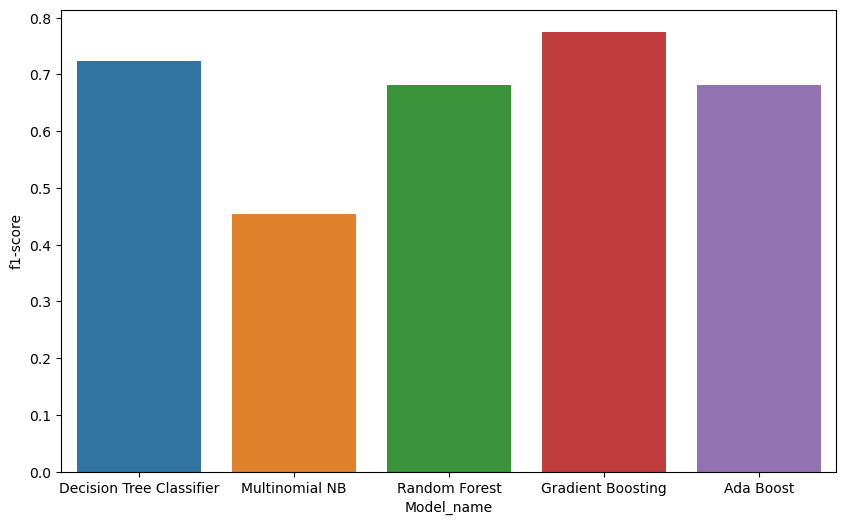

In [136]:
sns.barplot(x = 'Model_name',
            y = 'f1-score',
            data = spacy_data)
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

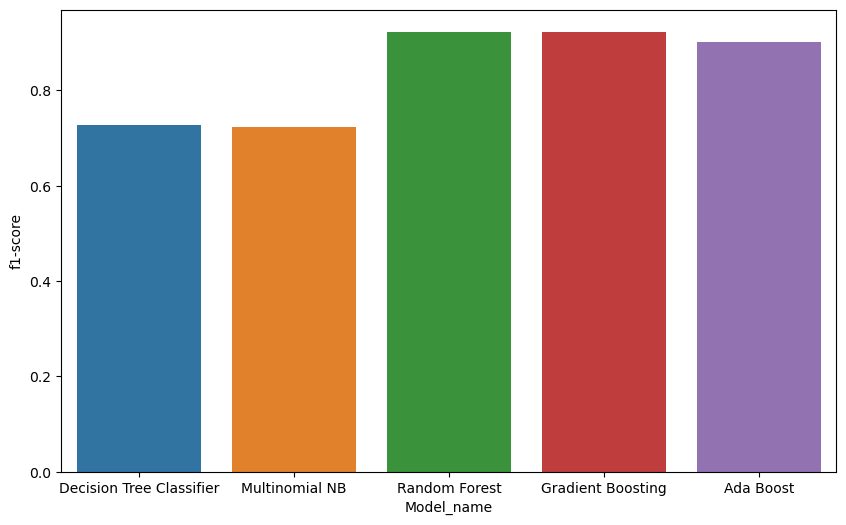

In [137]:
sns.barplot(x = 'Model_name',
            y = 'f1-score',
            data = tf_data)
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

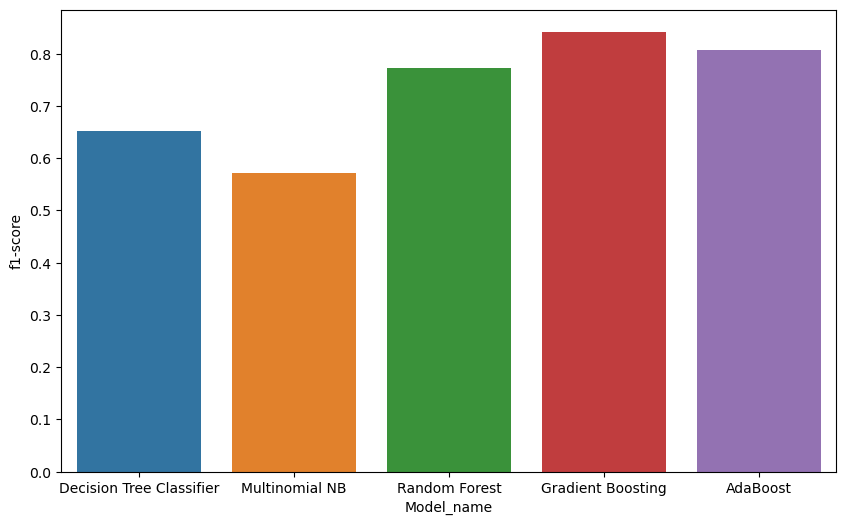

In [138]:
sns.barplot(x = 'Model_name',
            y = 'f1-score',
            data = bert_data)
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [139]:
gradient_data=data[data['Model_name']=='Gradient Boosting']

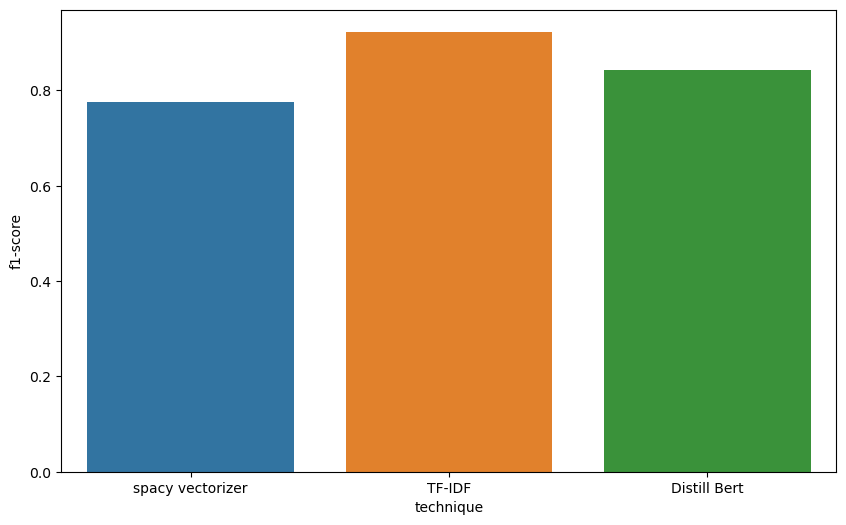

In [140]:
sns.barplot(x = 'technique',
            y = 'f1-score',
            data = gradient_data)
plt.rcParams['figure.figsize'] = [10, 6]
plt.show()

In [89]:
import joblib

In [90]:
joblib.dump(clf, 'text_classifier.pkl')
print("Model saved to text_classifier.pkl")

Model saved to text_classifier.pkl
